In [1]:
import sys
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  

In [2]:
#Load the data
games = pandas.read_csv("games.csv")

In [4]:
#Print the names of the col. in games
games.head()


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
games.shape

(81312, 20)

In [6]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [7]:
#Average rating is what we would try to predict 
#Average weight is based on the complexity

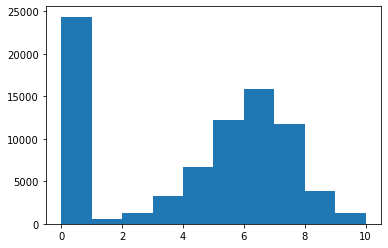

In [8]:
#Make a histogram of all the ratings in the average_rating columns
plt.hist(games["average_rating"])
plt.show()

In [9]:
 #Print the first row of all games with zero scores
print(games[games["average_rating"] == 0].iloc[0])

#print the first row of the games with the score greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

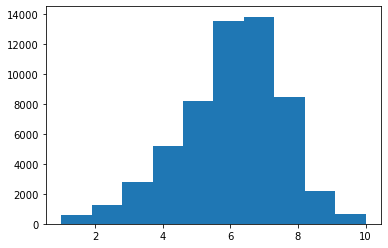

In [10]:
#Remove any rows without user reviews i.e. it shouldn't contain 0's
games = games[games["users_rated"] > 0]

#Remove any rows with missing values i.e. non-null
games = games.dropna(axis=0)

#Make a histogram of all the average ratings
plt.hist(games["average_rating"])
plt.show()

In [11]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [12]:
type(games)

pandas.core.frame.DataFrame

In [13]:
#removing the id column
del games['id']

In [14]:
print(games.columns)

Index(['type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


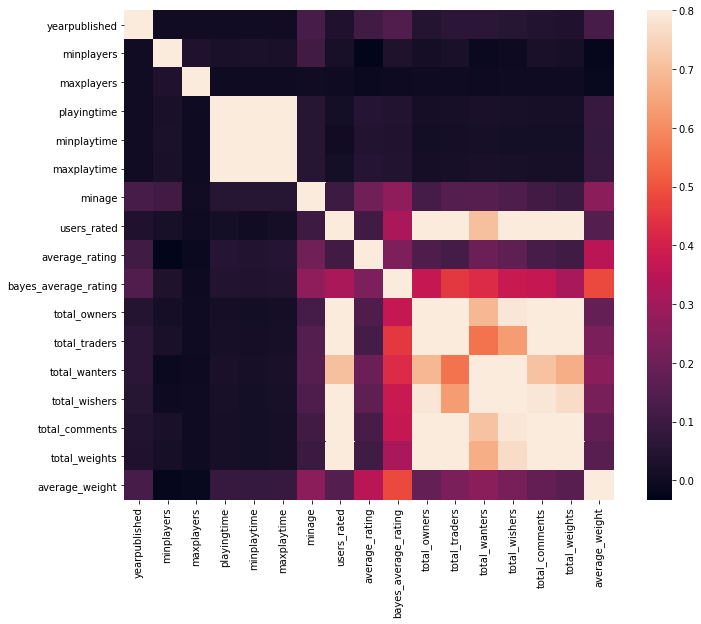

In [15]:
#Using seaborn, finding Correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize =(12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()
# if you see, you'd have type, name, and Id which are not the characteristic of the 
#game

In [16]:
#get all the columns from the dF
columns = games.columns.tolist()

#Filter the columns to remove we do not want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating","type","name","id"]]

target = "average_rating"

In [17]:
# Generate training and test datasets
train = games.sample(frac=0.8, random_state = 1)

#Select anything not in the training set and put in test
test = games.loc[~games.index.isin(train.index)]

#Print the shapes
print(train.shape)
print(test.shape)

(45515, 19)
(11379, 19)


Linear Regression Model

In [18]:
#Import linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize the model class
LR = LinearRegression()

#Fit the model the training data
LR.fit(train[columns], train[target])

LinearRegression()

In [19]:
#Generate the predictions for the test set 
predictions = LR.predict(test[columns])

#Compute error between our test predictions and actual values
mean_squared_error(predictions, test[target])

2.0788190326293243

Random Forest model

In [20]:
from sklearn.ensemble import RandomForestRegressor

#Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state=1)

#Fit the data
RFR.fit(train[columns],train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [21]:
#make predictions
predictions = RFR.predict(test[columns])

#Compute the error our test predictions and actual values
mean_squared_error(predictions, test[target])

1.4458560046071653

In [22]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [23]:
#Making predictions with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

#Print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [27]:
test[target].iloc[0]

8.07933

In [29]:
test.head()

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
9,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359
14,boardgame,Le Havre,2008.0,1.0,5.0,200.0,100.0,200.0,12.0,15774,7.99115,7.88172,16429,205,1343,5149,3458,1450,3.7531
15,boardgame,Brass,2007.0,3.0,4.0,180.0,120.0,180.0,13.0,8785,8.03071,7.85824,9171,149,798,2858,2259,1012,3.8646
18,boardgame,7 Wonders,2010.0,2.0,7.0,30.0,30.0,30.0,10.0,36732,7.87047,7.79413,44982,464,1046,5806,7126,2917,2.3384
20,boardgame,Keyflower,2012.0,2.0,6.0,120.0,90.0,120.0,12.0,6753,7.98786,7.74780,8599,78,1017,3197,1442,517,3.3056
